## Observations and Insights 

In [88]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata,study_results,how='outer',on='Mouse ID')
# Display the data table for preview
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [89]:
# Checking the number of mice.
mice_count = len(merged_data["Mouse ID"].value_counts())
mice_count

249

In [90]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_data = merged_data.duplicated(subset=['Mouse ID','Timepoint'])
duplicate_id = merged_data.loc[duplicate_data,'Mouse ID'].unique()
print(duplicate_id)

['g989']


In [91]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = merged_data.duplicated(subset=['Mouse ID','Timepoint'])
duplicates = merged_data[duplicate_data]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [92]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_data[merged_data['Mouse ID'].isin(duplicate_id)==False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [93]:
# Checking the number of mice in the clean DataFrame.
mice_count = len(clean_df["Mouse ID"].value_counts())
mice_count

248

## Summary Statistics

In [94]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summary_df = clean_df.groupby('Drug Regimen')

regimen_mean = summary_df['Tumor Volume (mm3)'].mean()

regimen_median = summary_df['Tumor Volume (mm3)'].median()

regimen_var = summary_df['Tumor Volume (mm3)'].var()

regimen_std = summary_df['Tumor Volume (mm3)'].std()

regimen_sem = summary_df['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({'Mean':regimen_mean,
                            'Median':regimen_median,
                            'Variance':regimen_var,
                            'Standard Deviation':regimen_std,
                            'SEM':regimen_sem})

summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [95]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
clean_df['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])

mean      50.435293
median    48.933454
var       79.462907
std        8.914197
sem        0.205591
Name: Tumor Volume (mm3), dtype: float64

## Bar and Pie Charts

<AxesSubplot:title={'center':'# of Measurements for Each Regimen'}, xlabel='Drug Regimen', ylabel='Number of Measurements'>

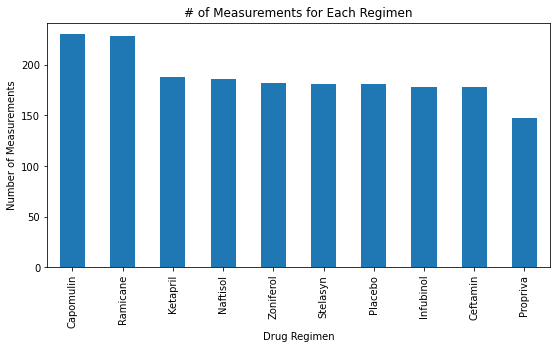

In [96]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_regimen = clean_df['Drug Regimen'].value_counts()
bar_plot = drug_regimen.plot(kind='bar',figsize=(9,4.5))

bar_plot.set_xlabel('Drug Regimen')
bar_plot.set_ylabel('Number of Measurements')
bar_plot.set_title('# of Measurements for Each Regimen')

bar_plot

<function matplotlib.pyplot.show(close=None, block=None)>

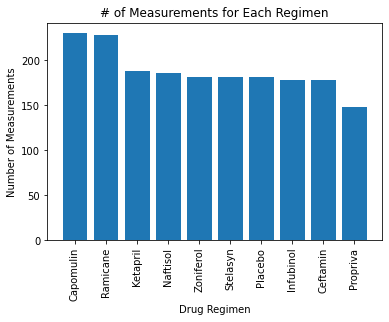

In [97]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_regimen = clean_df['Drug Regimen'].value_counts()

x_axis = np.arange(len(drug_regimen))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, drug_regimen)
plt.xticks(tick_locations, drug_regimen.index.values,rotation=90)

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Measurements')
plt.title('# of Measurements for Each Regimen')
plt.show

<AxesSubplot:title={'center':'Sex'}, ylabel=' '>

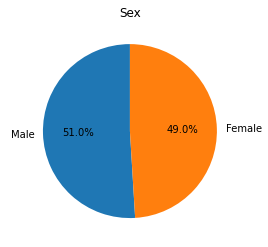

In [98]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_data = clean_df['Sex'].value_counts()

pie_plot = pie_data.plot(kind='pie',autopct="%1.1f%%",startangle=90)

pie_plot.set_title('Sex')
pie_plot.set_ylabel(' ')
pie_plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

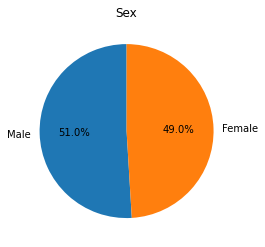

In [99]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_data = clean_df['Sex'].value_counts()
labels = ['Male','Female']

plt.pie(pie_data,autopct="%1.1f%%",labels=labels,startangle=90)
plt.title('Sex')
plt.plot

## Quartiles, Outliers and Boxplots

In [100]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_df.groupby('Mouse ID').max()['Timepoint']

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(max_timepoint,clean_df,on=('Mouse ID','Timepoint'),how='left')
merged_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [101]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_outliers = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
tumor_vol = merged_df['Tumor Volume (mm3)']
quartiles = tumor_vol.quantile([.25,.5,.75])
quartile_one = quartiles[.25]
quartile_three = quartiles[0.75]
iqr = quartile_three - quartile_one

lower_bound = quartile_one - (1.5*iqr)
upper_bound = quartile_three + (1.5*iqr)

# Locate the rows which contain mice on each drug and get the tumor volumes
capomulin = merged_df.loc[merged_df['Drug Regimen']=='Capomulin',:]['Tumor Volume (mm3)']
ramicane = merged_df.loc[merged_df['Drug Regimen']=='Ramicane',:]['Tumor Volume (mm3)']
infubinol = merged_df.loc[merged_df['Drug Regimen']=='Infubinol',:]['Tumor Volume (mm3)']
ceftamin = merged_df.loc[merged_df['Drug Regimen']=='Ceftamin',:]['Tumor Volume (mm3)']

# add subset 
tumor_vol_data = [capomulin,ramicane,infubinol,ceftamin]    
    
# Determine outliers using upper and lower bounds
print(f'Outliers for the entire dataset can be any values below {lower_bound} and above {upper_bound}')

Outliers for the entire dataset can be any values below 17.109230961249963 and above 93.82025999125004


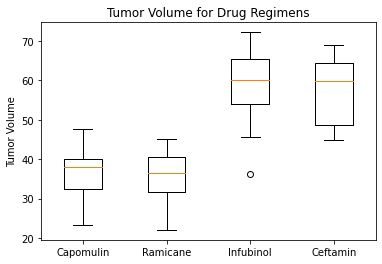

In [102]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume for Drug Regimens')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(tumor_vol_data,labels=treatments)
plt.show()

## Line and Scatter Plots

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


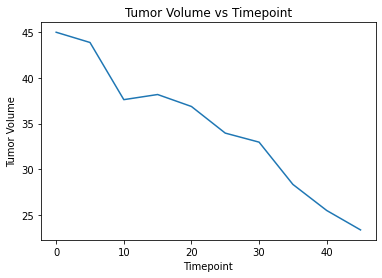

In [103]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_data = clean_df.loc[clean_df['Drug Regimen']=='Capomulin',:]
cap_mouse = capomulin_data.loc[capomulin_data['Mouse ID']=='s185',:]


timepoint = cap_mouse['Timepoint']
tumor_volume = cap_mouse['Tumor Volume (mm3)']

plt.title('Tumor Volume vs Timepoint')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.plot(timepoint,tumor_volume)
capomulin_data

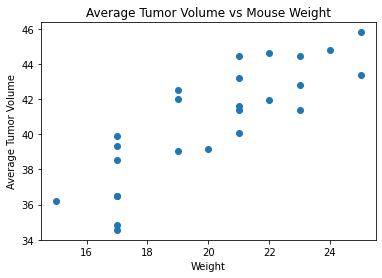

In [104]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_avg = capomulin_data.groupby(['Mouse ID']).mean()

plt.scatter(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])
plt.title('Average Tumor Volume vs Mouse Weight')
plt.xlabel('Weight')
plt.ylabel('Average Tumor Volume')

plt.show()

## Correlation and Regression

The correlation coefficient is 0.84.


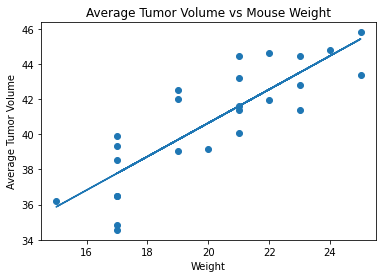

In [105]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight = capomulin_avg['Weight (g)']
tumor_vol = capomulin_avg['Tumor Volume (mm3)']
r = round(st.pearsonr(weight,tumor_vol)[0],2)
print(f'The correlation coefficient is {r}.')

cap_slope, cap_int, cap_r, cap_p, cap_std_err = stats.linregress(weight,tumor_vol)
cap_fit = cap_slope * weight + cap_int

plt.scatter(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])
plt.plot(weight,cap_fit)
plt.title('Average Tumor Volume vs Mouse Weight')
plt.xlabel('Weight')
plt.ylabel('Average Tumor Volume')

plt.show()